## Main Work(3.9-3.15)
|Task|Content|Problem|
|:--:|:--:|:--:|
|1| LaTex +Code (3.9-3.10)  | 中文编译问题
|2| Opaml 环境搭建 (3.10-3.12) | Jupyter-notebook kernel管理
|3|SIG程序分析技术沙龙回顾(3.14)| 加宽，赋值迁移，drawing，凸性局限性
|4|RealworldOCaml Chapter1(3.10-3.15)|科学上网&&Core模块更新(3.11)&&Time.to_string time(3.12)
|5|GitKraken可视化Git工具|修改host地址防止更新
|6|系统清理|实验文件不清晰

--- --- --- 

## Next Work (3.16-3.22)
|Task|Content|Problem|
|:--:|:--:|:--:|
|1| LaTex学习一 | 推荐教程，切入点
|2| RealWorldOCaml Chapter2 | CSDN博客管理/Git同步
|4| 了解人工智能的形式化验证技术 | 纸质笔记 
|5| 了解Docker|入门与实践Ch1

---
### Current Problem
1. 方向
2. 计划
3. 进度

# Chapter 1
1. gives an overview of OCaml by walking through a series of small example that cover most of the major features of the language.
2. `Core`: a more full-featured and capable replacement for OCaml's standard library.
3. `utop`: a shell that lets you type in expressions and evaluate the interactively.
4. `toplever`: which you can start by typing ocaml at the command line.
        

## 1.1OCaml as a Calculator

In [ ]:
open Core;;

This makes the definitions in Core available.
Now let's try 
### a few simple numerical calculations.

In [ ]:
3+4;;

In [ ]:
8/3;;

In [ ]:
3.5 +. 6.;;

In [ ]:
30_000_000 / 300_000;;

In [ ]:
sqrt 9.;;

In [ ]:
1 / 3

In [ ]:
1. /. 3. 

1. type ;; in order to tell the toplevel that if should evaluate an expression.This is a peculiarity of the toplevel that is not required in standalone programs.
2. After evaluating an expression, the toplevel first prints the type of the result, and then prints the result ifself.
3. Function arguments are separated by `space` instead of by parentheses and commas.
4. place underscores in the middle of numetric literals to improve readability. Note that underscores can be placed anywhere within a number.
5. OCaml carefully distinguishes between `float` and `int`. The types have different literals(6. instead of 6) and different infix operator(+. insted of +), and OCaml doesn't automatically cast between these types. 


### `a let binding`
create a variable to name the value of a given expression, using the `let` keyword. 

In [ ]:
let x = 3 + 4;; 

In [ ]:
let y = x + x;;

#### some constraints on what identifiers can be used for variale names
1. Punctuation is excluded, except for `_` and `'`
2. variables must start with a lowercase letter or an underscore.

###### legal:

In [ ]:
let x7 = 3 + 4;;

In [ ]:
let x_plus_y = x + y;;

In [ ]:
let x' = x + 1;;

In [ ]:
let _x' = x' + x;;

Note: by default, *utop* doesn't bother to print out variables starting with an underscore. 

In [ ]:
(*
let 7x = 7;;
let x-plus-y = x + y;;
let Seven = 3 + 4;;
*)

In [ ]:
let x-plus-y = x + y;;

### 1.2Functions and Type Inference


In [ ]:
(* let syntax can also be used to define a function:*)
let square x = x * x;;
square 2;;
square (square 2);;

+ Functions in OCaml are values like any other, which is why we use the let keyword to bind a function to a variable name, just as we use let to bind a simple value like an integer to a variable name.

+ the types have gotten more interesting too. `int -> int` is a `funciton type`, in this case indicating a function that takes an int and returns an int.

##### write functions that take multiple arguments

In [ ]:
let ratio x y =
  Float.of_int x /. Float.of_int y
  ;;
ratio 4 7;;

+ Note that module names always start with a capital letter.
+ `int -> int -> float` describes a function that takes two `int` arguments and returns a `float`.


##### write functions that take other functions as arguments. 

In [ ]:
let sum_if_true test first second = 
  (if test first then first else 0)
  + (if test second then second else 0)
;;
(*an example of a function that takes three arguments: a test function and two integer arguments.The function returns the sum of the integers that pass the test.*)

If we look the inferred type signature in detail, we see that the first argument is a function that takes an integer and returns a boolean, and that the remaining two arguments are integers. Here's an example of this function in action:

In [ ]:
let even x = 
  x mod 2 = 0;;
sum_if_true even 3 4;;
sum_if_true even 2 4;;

In [ ]:
3 mod 2 = 0

Note that in the definition of even, we used `=` in two different ways: once as the part of the let binding that separates the thing being defined from its definition; once as an equality test, when comparing `x mod 2` to `0`

### 1.2.1 Type Inference
+ OCaml determines the type of an expression using a technique called `type inference`, by which the type of an expression is infered from the available type information about the components of that expression.

#### the process of inferring the type of `sum_if_type`:
1. OCaml requires that both branches of an `if` statement have the same type, so the expression `if test first then first else 0` requires that `first` must be the same tlype as `0`, and so `first` must be of type int.
2. test is passed first as an argument.Since first has type int, the input type of test must be int.
3. test first is used as the condition in an if statement, so the return type of test must be bool.
4. The fact that `+` returns int implies that the return value of sum_if_true must be int.

Together, that nails down the types of all the variables, which determines the overall type of sum_if_true.

##### add explicit type annotations

In [ ]:
let sum_if_true(test: int -> bool)(x: int)(y: int) : int =
  (if test x then x else 0)
  +(if test y then y else 0)
;;

### 1.2.2Inferring Generic Types

+ OCaml has introduced a `type variable` 'a to express that the type is generic.
+ parametric polymorphim: it works by parameterizing the type in question with a type varible.

In [ ]:
let first_if_true test x y =
  if test x then x else y
;;

In [ ]:
let long_string s = String.length s > 6;;
first_if_true long_string "short" "loooooong";;

In [ ]:
let big_number x = x >3;;
first_if_true big_number 4 3;;

In [ ]:
(*
first_if_true big_number "short" "looooong";;
*)

###### Type Errors Versus Exceptions

There's a big difference in OCaml(and really in any compiled language) between errors that are caught at compile time and those that are caught at runtime.

In [ ]:
let add_potato x = 
  x + "potato";;

In [ ]:
let is_a_multiple x y = 
  x mod y = 0;;
is_a_multiple 8 2;;
is_a_multiple 8 0;;

The distinction here is that type errors will stop you whether or not the offending code is ever actually executed. Merely defining add_potato is an error, whereas is_a_mlultiple only fails when it's called, and then, only when it's called with an input that triggers the exception. 

### 1.3 Tuples,Lists,Options, and Pattern Matching

#### Tuples
A tuple is an **ordered** collection of values that can each be of a different type. You can create a tuple by jointing values together with a comma:

In [ ]:
let a_tuple = (3,"there");;
let another_tuple = (3,"four",5.);;

For the mathematically inclined, the * character is used because the set of all pairs of type t * s corresponds to the Cartesian product of the set of elements of type t and the set of elements of type s.

In [ ]:
let (x,y) = a_tuple;;

In [ ]:
x + String.length y;;

Note that the same syntax is used both for construction and for constructing and for pattern matching on tuples.

In [ ]:
let distance (x1,y1)(x2,y2) = 
  sqrt ((x1 -. x2)**2. +. (y1 -. y2)**2.)

### 1.3.2 Lists

+ tuples : a fixed number of items, potetially of different types.
+ lits : hold any number of items of the same type.

In [ ]:
let languages = ["OCaml";"Perl";"C"];;

In [ ]:
(* can't mix elements of different types in the same list, unlike tuples*)
let numbers = ["3";"four";5];;

##### The List module


In [ ]:
open Core;;

In [ ]:
List.length languages;;

In [ ]:
List.map languages ~f:String.length;;

In [ ]:
List.map ~f:String.length languages;;

Notably
+ the function passed to List.map is passed under a `labeled argument~f`.
+ Labeled arguments are specified by name rather than by position
+ and thus allow you to change the order

In [ ]:
List.map ~f:String.length languages;;

 #### Constructing lists with `::`

In [ ]:
"French" :: "Spanish" :: languages;;

Create a new and extended list, not changing the list we started with.

In [ ]:
languages;;

#### Semicolons Versus Commas

In [ ]:
["OCaml", "Perl", "C"];;

In particular, rather than a list of three strings, what we have is a singleton list containing a three-tuple of strings.

In [ ]:
1,2,3;;

This example uncovers the fact that commas create a tuple, even if there are no surrounding parens.

In [ ]:
[1; 2; 3];;

In [ ]:
1 :: (2 :: (3 ::[]));;

In [ ]:
1 :: 2 :: 3 ::[];;

list concatenation operaator @
+ unlike `::`, this is not a constant-time operation

In [ ]:
[1;2;3] @ [4;5;6];;

### List patterns using match

In [ ]:
let my_favorite_language (my_favorite :: the_test) = 
  my_favorite
;;

In [ ]:
my_favorite_language ["English", "Spanish", "French"];;

In [ ]:
my_favorite_language [];;

pipe characters |

In [ ]:
let my_favorite_language languages = 
  match languages with
  | first :: the_rest -> first
  | [] -> "OCaml"(*a good default*)
;;

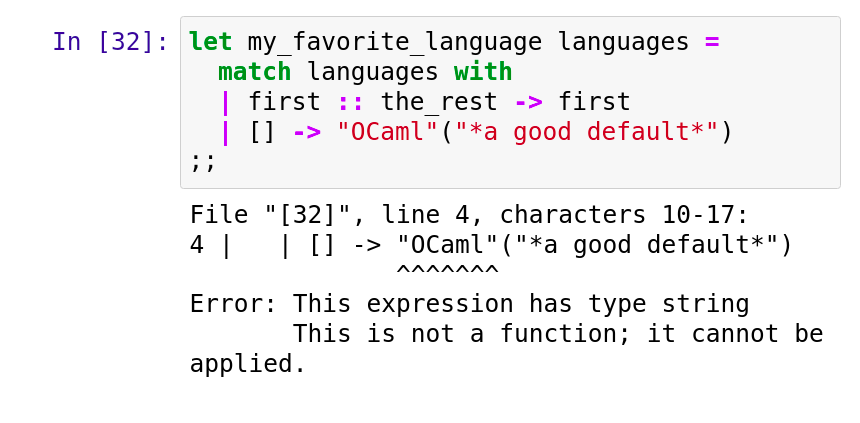

In [ ]:
my_favorite_language["English";"Spanish";"French"];;
my_favorite_language [];;

#### Recursive list function

In [ ]:
let rec sum l = 
  match l with 
  | [] -> 0                 (* base case *)
  | hd :: tl -> hd + sum tl (* inductive case *)
;;
sum [1;2;3];;

+ Following the common OCaml idiom, we use hd to refer to the head of the list and tl to refer to the tail.
+ `rec` keyword: to allow sum to refer to itself

remove sequential duplicates

In [ ]:
let rec destutter list = 
  match list with 
  | [] -> []
  | hd1 :: hd2 :: tl -> 
    if hd1 = hd2 then destutter (hd2 :: tl)
    else hd1 :: destutter(hd2 :: tl)
;;

In particular, we don't handle one-element lists.

In [ ]:
(* open Core;; *)
let rec destutter list = 
  match list with 
  | [] -> []
  | [hd] -> [hd]
  | hd1 :: hd2 :: tl -> 
    if hd1 = hd2 then destutter (hd2 :: tl)
    else hd1 :: destutter (hd2 :: tl)

### Options
An option is used to express that a value might or might not be present.

In [ ]:
let divide x y =
  if y = 0 then None else Some(x/y);;

+ `Some` and `None` are constuctors that let you build optional values, just as `::` and `[]` let you build lists.
+ You can think of an option as a specialized list that can only have zero or one elements.

Consider the following function for creating a log entry string given an optional time and a message. If no time is provided (i.e.,if the time is None), the current time is computed and used in its place: 

In [ ]:
open Core;;

In [ ]:
let log_entry maybe_time message = 
  let time = 
    match maybe_time with
    | Some x -> x 
    | None -> Time.now()
  in 
  Time.to_string time ^ " -- " ^ message
(*   Time.to_sec_string ~zone:Core.Zone.local (time) ^ " -- " ^ message *)
(*   Time.to_sec_string time ^ "--" ^ message *)
;;  

In [ ]:
log_entry(Some Time.epoch) "A long long time ago";;
log_entry None "Up to the minute";;

### Nesting lets with let and in

In [ ]:
let x = 7 in 
  x + x
  ;;

In [ ]:
x;;

In [ ]:
let x = 7 in 
let y = x * x in 
x + y
;;

### 1.4Records and Variants 

In [2]:
type point2d = {x : float; y : float};;

type point2d = { x : float; y : float; }


In [3]:
let p = {x = 3.; y = -4.};;

val p : point2d = {x = 3.; y = -4.}


In [4]:
let magnitude {x = x_pos; y = y_pos} = 
  sqrt (x_pos**2. +. y_pos ** 2.);;

val magnitude : point2d -> float = <fun>


In [5]:
let magnitude {x;y } = sqrt (x ** 2. +. y **2.);;

val magnitude : point2d -> float = <fun>


In [6]:
let distance v1 v2 = 
  magnitude { x = v1.x -. v2.x; y = v1.y -. v2.y };;

val distance : point2d -> point2d -> float = <fun>


In [7]:
type circle_desc = { center: point2d; radius: float}
type rect_desc = { lower_left: point2d; width: float; height:float}
type segment_desc = {endpoint1: point2d; endpoint2: point2d} ;;

type circle_desc = { center : point2d; radius : float; }


type rect_desc = { lower_left : point2d; width : float; height : float; }


type segment_desc = { endpoint1 : point2d; endpoint2 : point2d; }


In [8]:
type scene_element = 
  | Circle of circle_desc
  | Rect of rect_desc
  | Segment of segment_desc
;;

type scene_element =
    Circle of circle_desc
  | Rect of rect_desc
  | Segment of segment_desc


In [9]:
let is_inside_scene_element point scene_element = 
  match scene_element with
  | Circle {center; radius} ->
    distance center point < radius
  | Rect { lower_left; width; height } ->
    point.x > lower_left.x && point.x < lower_left.x +. width
    && point.y > lower_left.y && point.y < lower_left.y +. height
  | Segment {endpoint1; endpoint2} -> false
;;

val is_inside_scene_element : point2d -> scene_element -> bool = <fun>


In [11]:
open Core;;

In [12]:
let is_inside_scene point scene = 
  List.exists scene
    ~f:(fun el -> is_inside_scene_element point el)
;;

val is_inside_scene : point2d -> scene_element list -> bool = <fun>


In [13]:
is_inside_scene {x=3.;y=7.}
  [ Circle {center = {x=4.;y=4.}; radius = 0.5 }];;

- : bool = false


In [14]:
is_inside_scene{x=3.;y=7.}
  [Circle {center = {x=4.;y=4.}; radius = 5.0 }];;

- : bool = true


### 1.5 Imperative Programming

In [15]:
let numbers = [| 1; 2; 3; 4 |];;

val numbers : int array = [|1; 2; 3; 4|]


In [16]:
numbers.(2) <- 4;;

- : unit = ()


In [17]:
numbers;;

- : int array = [|1; 2; 4; 4|]


#### Mutable Record Fields

In [2]:
type running_sum = 
 { mutable sum: float;
   mutable sum_sq: float;
   mutable samples: int;
 }
;;

type running_sum = {
  mutable sum : float;
  mutable sum_sq : float;
  mutable samples : int;
}


In [3]:
let mean rsum = rsum.sum /. float rsum.samples
let stdev rsum = 
  sqrt (rsum.sum_sq /. float rsum.samples
        -. (rsum.sum /. float rsum.samples) ** 2.);;

val mean : running_sum -> float = <fun>


val stdev : running_sum -> float = <fun>


In [5]:
let create () = { sum = 0.; sum_sq = 0.; samples = 0 }
let update rsum x = 
   rsum.samples <- rsum.samples + 1;
   rsum.sum     <- rsum.sum     +. x;
   rsum.sum_sq  <- rsum.sum_sq  +. x *. x
;;

val create : unit -> running_sum = <fun>


val update : running_sum -> float -> unit = <fun>


In [7]:
let rsum = create();;

val rsum : running_sum = {sum = 0.; sum_sq = 0.; samples = 0}


In [11]:
open Core;;

In [12]:
List.iter [1.;3.;2.;-7.;4.;5.]~f:(fun x -> update rsum x);;

- : unit = ()


In [13]:
mean rsum;;

- : float = 1.3333333333333333


In [14]:
stdev rsum;;

- : float = 3.944053188733077


### 1.5.3ref

In [15]:
let x = {contents = 0};;
x.contents <- x.contents + 1;;
x;;

val x : int Core.ref = {contents = 0}


- : unit = ()


- : int Core.ref = {contents = 1}


In [16]:
let x = ref 0 (* 创建一个ref,即{ contents = 0 } *);;

val x : int Core.ref = {contents = 0}


In [17]:
!x

- : int = 0


In [18]:
x := !x + 1

- : unit = ()


In [19]:
!x

- : int = 1


In [21]:
type 'a  ref = {mutable contents : 'a }
let ref x = { contents = x }
let (!) r = r.contents
let (:=) r x = r.contents <- x
;;

type 'a ref = { mutable contents : 'a; }


val ref : 'a -> 'a ref = <fun>


val ( ! ) : 'a ref -> 'a = <fun>


val ( := ) : 'a ref -> 'a -> unit = <fun>


In [22]:
let sum list =
  let sum = ref 0 in 
  List.iter list ~f:(fun x -> sum := !sum + x);
  !sum
;;

val sum : int list -> int = <fun>


### 1.5.4 for and while loop

In [1]:
open Core;;

In [2]:
let permute array = 
  let length = Array.length array in
  for i = 0 to length -2 do
      (* 选择一个要交换的j *)
      let j = i + Random.int (length - i) in 
      (* 交换 i和j *)
      let tmp = array.(i) in 
      array.(i) <- array.(j);
      array.(j) <- tmp
  done
;;  

val permute : 'a Core.Array.t -> unit = <fun>


In [3]:
let ar = Array.init 20 ~f:(fun i -> i);;
permute ar;;
ar;;

val ar : int Core.Array.t =
  [|0; 1; 2; 3; 4; 5; 6; 7; 8; 9; 10; 11; 12; 13; 14; 15; 16; 17; 18; 19|]


- : unit = ()


- : int Core.Array.t =
[|15; 1; 2; 6; 16; 7; 13; 4; 10; 8; 5; 12; 9; 14; 19; 0; 11; 3; 17; 18|]


In [4]:
let find_first_negative_entry array = 
  let pos = ref 0 in 
  while !pos < Array.length array && array.(!pos) >= 0 do
    pos := !pos + 1
  done;
  if !pos = Array.length array then None else Some !pos
;;

val find_first_negative_entry : Core_kernel.Int.t Core.Array.t -> int option =
  <fun>


In [5]:
find_first_negative_entry[|1;2;0;3|]

- : int option = None


In [6]:
find_first_negative_entry[|1;-2;0;3|];;

- : int option = Some 1


In [7]:
let find_first_negative_entry array = 
  let pos = ref 0 in 
  while 
    let pos_is_good = !pos < Array.length array in
    let element_is_non_negative = array.(!pos) >= 0 in
    pos_is_good && element_is_non_negative
  do
    pos := !pos + 1
  done;
  if !pos = Array.length array then None else Some !pos
;;

val find_first_negative_entry : Core_kernel.Int.t Core.Array.t -> int option =
  <fun>


In [8]:
find_first_negative_entry[|1;2;0;3|];;

error: runtime_error

## 1.6

In [ ]:
%%writefile sum.ml
open Core
let rec read_and_accumulate accum =
  let line = In_channel.input_line In_channel.stdin in
  match line with
  | None -> accum
  | Some x -> read_and_accumulate (accum +. Float.of_string x)
let () = 
  printf "Total: %F\n"(read_and_accumulate 0.)

File "[1]", line 1, characters 0-2Parse error: illegal begin of use_file
Uncaught exception:
  
  Exit

Raised at Top.wrap in file "camlp4/Camlp4Top/Top.ml", line 61, characters 8-18
Called from Jupyter_repl__Evaluation.eval in file "evaluation.cppo.ml", line 114, characters 24-56
Re-raised at Location.report_exception.loop in file "parsing/location.ml", line 926, characters 14-25
Called from Jupyter_repl__Error.to_string_hum in file "error.cppo.ml", line 147, characters 2-29
Called from Jupyter_repl__Evaluation.eval in file "evaluation.cppo.ml", line 120, characters 14-62
Called from Jupyter_repl__Process.create_child_process.main_loop in file "jupyter/src/repl/process.ml", line 73, characters 8-80
Called from Jupyter_main in file "jupyter/bin/jupyter_main.ml", line 47, characters 4-149


Raised at Stdlib.invalid_arg in file "stdlib.ml", line 30, characters 20-45
Called from Toploop in file "toplevel/toploop.ml", line 516, characters 2-159
Called from Topdirs.load_compunit in file "toplevel/topdirs.ml", line 153, characters 11-23


In [ ]:
!corebuild sum.native

In [ ]:
!./sum.native